# Week 6 In-Class Python Lab
---

## A Note About This Lab (And Real-World Data Work)


While this lab is a **guided EDA experience**, it is important to understand that in real data analyst and data scientist roles, you will often **not** be given step-by-step prompts like the ones you see here.


In professional settings, you are usually given:
- A dataset
- A business or research problem
- A general goal (e.g., reduce readmissions, improve patient outcomes, reduce cost)


From there, **you are responsible for:**
- Investigating the data structure
- Identifying data quality issues
- Deciding which questions are worth asking
- Determining which visualizations or summaries help answer those questions
- Translating findings into real-world recommendations


This lab is designed to help you **practice the thinking process** you will need later:


👉 What questions should I ask first? 
👉 What patterns should I check for? 
👉 What might leadership or stakeholders care about? 
👉 What might be misleading if I only look at high-level summaries?


As you progress through the course, prompts will become less specific, and you will be expected to:
- Formulate your own analytical questions 
- Choose appropriate methods independently 
- Justify your analytical decisions 


That transition is intentional and it reflects how real data work happens.


You are not just learning tools. 
You are learning how to **think like an analyst.**

---

## Advanced Pandas + Visual Exploratory Data Analysis (Healthcare Outcomes)

In this lab, you will work with a real-world healthcare dataset using pandas, matplotlib, and seaborn.

You will NOT be told exactly which charts or commands to use. Instead, you will answer healthcare questions using data summaries and visualizations.

---

## Scenario

You are a healthcare data analyst working with hospital leadership.

Leadership wants to understand:
- Which patients are most at risk of readmission
- Which hospital utilization factors relate to readmission
- Whether subgroup patterns change overall conclusions


In [11]:
# START HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Activity 1 — Load the Data

## Healthcare Question
Is the dataset loaded correctly and ready for analysis?

In [17]:
# TODO
# Load dataset into a DataFrame named df
# Display first few rows
df = pd.read_csv("C:/Users/winni/class-projects/TKH-26-labs/Phase_1/datasets/diabetic_data.csv")
df.head(15)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Activity 2 — Dataset Structure + Initial Visualization

## Healthcare Question
What types of patient and hospital variables exist in this dataset?

## Required Tasks
- Create summary tables
- Create at least ONE visualization showing distribution of an important variable


In [21]:
# TODO
# Inspect dataset structure
# Generate descriptive summary statistics
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<Axes: xlabel='readmitted', ylabel='count'>

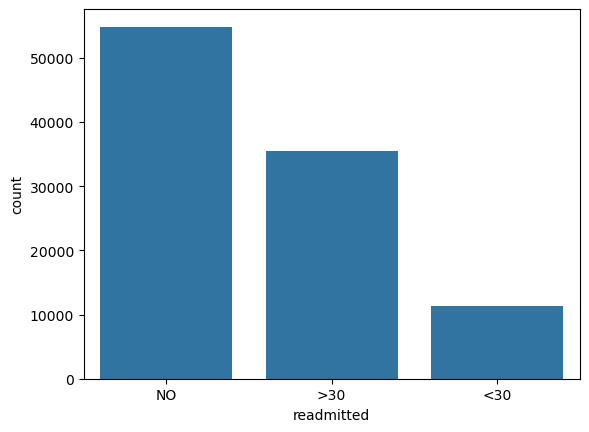

In [24]:
# TODO
# Create at least ONE visualization showing distribution of an important variable
sns.countplot(data = df, x='readmitted')

In [26]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='race'>

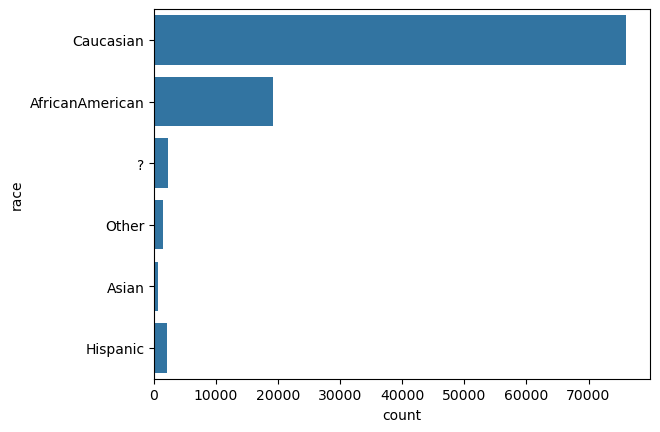

In [27]:
sns.countplot(df['race'])

<Axes: xlabel='age'>

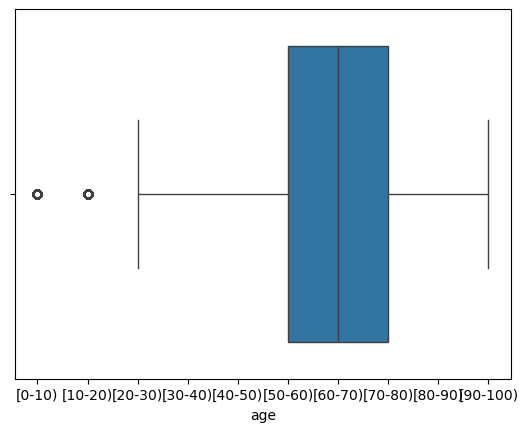

In [29]:
sns.boxplot(data=df, x="age")

# Activity 3 — Data Cleaning

## Healthcare Question
What data quality issues must be addressed before making healthcare recommendations?

In [ ]:
# TODO
# Standardize missing values
# Inspect missing value counts


Consider how handling outliers and/or missing values changes your analysis. Again, this is more of art than science. Be sure to share your reasoning here, just as you would to the stakeholders

# Activity 4 — Population + Outcome Visualization

## Healthcare Question
Which patient groups represent the largest share of readmissions?

In [ ]:
# TODO
# Create at least ONE visualization showing readmission distribution


# Activity 5 — Binning + Visualization

## Healthcare Question
Does readmission risk increase as hospital stay length increases?

## Required Tasks
- Create bins using cut()
- Create bins using qcut()
- Calculate readmission rate per bin
- Visualize readmission patterns across bins


In [ ]:
# TODO
# Create time_bin_cut using pd.cut()
# Create time_bin_qcut using pd.qcut()


In [ ]:
# TODO
# Calculate readmission rates by bin


# 🔍 New Visualization Tool — Heatmaps

## What Is A Heatmap?

A heatmap uses color intensity to show magnitude of values.

Heatmaps are commonly used to show:
- Risk levels across groups
- Rates or percentages
- Correlations

## Real Analyst Skill
Look up seaborn heatmap documentation before completing the next task.


In [ ]:
# TODO
# Create heatmap showing readmission rates by bin


# Activity 6 — Simpson’s Paradox Exploration Using lmplot

## Real Analyst Skill
Look up seaborn lmplot documentation before completing this section.

## Healthcare Question
Does the relationship between hospital stay length and medication count change when examining readmission groups?

## Simpson Investigation Questions

1. Does overall data show positive or negative relationship?
2. Do subgroup regression lines differ?
3. Is this Simpson’s Paradox? Why or why not?
4. Why could relying only on overall healthcare data be dangerous?


In [ ]:
# TODO
# Create lmplot showing overall relationship


In [ ]:
# TODO
# Create lmplot colored by readmission group


# Final Deliverable — Stakeholder Memo

Include:
- Highest risk patient groups
- Key utilization drivers
- Whether subgroup analysis changed conclusions
- Whether Simpson’s Paradox was present
- One recommended hospital action


In [ ]:
# TODO
# Write stakeholder memo in markdown

If you've made it this far, consider other questions that may have arisen as you've worked through this guided EDA. What else would you like to explore and why?